# 🚀 NASA Exoplanet Datasets Comparison Analysis
## K2 vs Kepler vs TESS - Comprehensive Feature Analysis

Bu notebook, üç büyük NASA exoplanet survey misyonunun veri setlerini karşılaştırır:
- **K2**: 4,004 samples
- **Kepler**: 9,564 samples  
- **TESS**: 7,703 samples

### Analiz Hedefleri:
1. **Ortak Özellikler**: Üç veri setinde bulunan ortak kolonlar
2. **Veri Set Karakteristikleri**: Sample sayıları, feature sayıları, target dağılımları
3. **Missing Value Analizi**: Eksik veri oranları
4. **Feature Tipleri**: Stellar, planetary, observational özelliklerin dağılımı
5. **Target Kategori Mapping**: 3-class classification için ortak yaklaşım

In [1]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🔍 Ready for comprehensive dataset comparison analysis!")

✅ Libraries imported successfully!
🔍 Ready for comprehensive dataset comparison analysis!


In [2]:
# 2. LOAD ALL THREE DATASETS
print("📂 Loading all three NASA exoplanet datasets...")

# Load K2 dataset
k2_df = pd.read_csv('k2/k2.csv')
print(f"✅ K2 loaded: {k2_df.shape}")

# Load Kepler dataset
kepler_df = pd.read_csv('kepler/kepler.csv')
print(f"✅ Kepler loaded: {kepler_df.shape}")

# Load TESS dataset
tess_df = pd.read_csv('tess/TOI.csv')
print(f"✅ TESS loaded: {tess_df.shape}")

print(f"\n🎯 DATASET SUMMARY:")
print(f"📊 K2: {len(k2_df):,} samples, {len(k2_df.columns)} features")
print(f"📊 Kepler: {len(kepler_df):,} samples, {len(kepler_df.columns)} features")
print(f"📊 TESS: {len(tess_df):,} samples, {len(tess_df.columns)} features")
print(f"📈 Total: {len(k2_df) + len(kepler_df) + len(tess_df):,} exoplanet observations!")

📂 Loading all three NASA exoplanet datasets...
✅ K2 loaded: (4004, 295)
✅ Kepler loaded: (9564, 141)
✅ TESS loaded: (7703, 87)

🎯 DATASET SUMMARY:
📊 K2: 4,004 samples, 295 features
📊 Kepler: 9,564 samples, 141 features
📊 TESS: 7,703 samples, 87 features
📈 Total: 21,271 exoplanet observations!


📈 BASIC DATASET CHARACTERISTICS
Dataset  Samples  Features   Target_Column  Target_Classes  Missing_Values Missing_Percentage
     K2     4004       295     disposition               4          549418              46.5%
 Kepler     9564       141 koi_disposition               3          237112              17.6%
   TESS     7703        87     tfopwg_disp               6          111013              16.6%


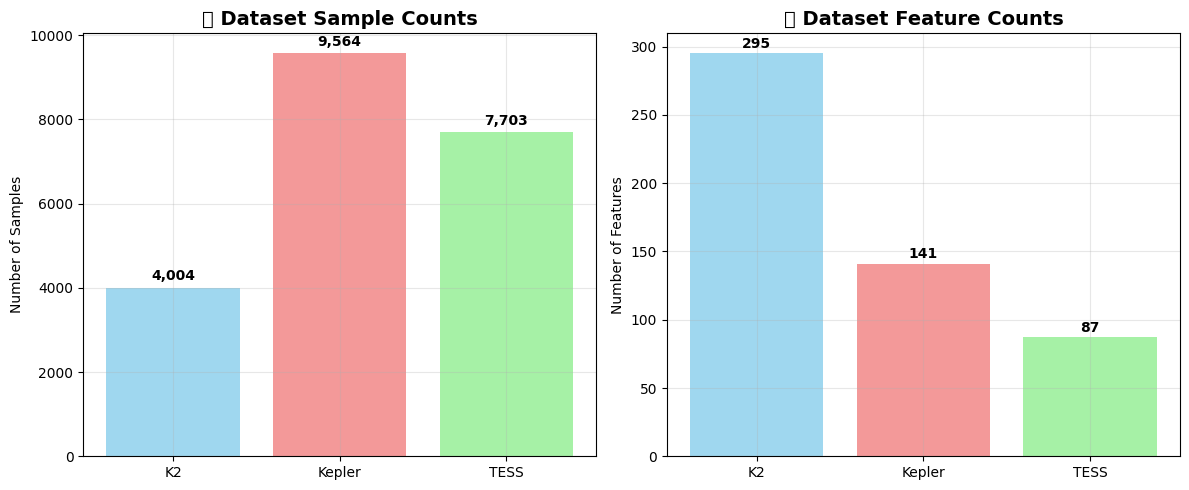

In [3]:
# 3. BASIC DATASET CHARACTERISTICS
print("📈 BASIC DATASET CHARACTERISTICS")
print("=" * 60)

datasets = {
    'K2': k2_df,
    'Kepler': kepler_df,
    'TESS': tess_df
}

target_columns = {
    'K2': 'disposition',
    'Kepler': 'koi_disposition', 
    'TESS': 'tfopwg_disp'
}

# Create summary dataframe
summary_data = []
for name, df in datasets.items():
    target_col = target_columns[name]
    
    summary_data.append({
        'Dataset': name,
        'Samples': len(df),
        'Features': len(df.columns),
        'Target_Column': target_col,
        'Target_Classes': len(df[target_col].unique()),
        'Missing_Values': df.isnull().sum().sum(),
        'Missing_Percentage': f"{(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Visualize dataset sizes
plt.figure(figsize=(12, 5))

# Sample counts
plt.subplot(1, 2, 1)
datasets_names = list(datasets.keys())
sample_counts = [len(df) for df in datasets.values()]
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars = plt.bar(datasets_names, sample_counts, color=colors, alpha=0.8)
plt.title('📊 Dataset Sample Counts', fontsize=14, fontweight='bold')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, sample_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Feature counts
plt.subplot(1, 2, 2)
feature_counts = [len(df.columns) for df in datasets.values()]

bars = plt.bar(datasets_names, feature_counts, color=colors, alpha=0.8)
plt.title('📈 Dataset Feature Counts', fontsize=14, fontweight='bold')
plt.ylabel('Number of Features')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, feature_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

🎯 TARGET DISTRIBUTION ANALYSIS

K2 (disposition):
  • CONFIRMED: 2,315 (57.8%)
  • CANDIDATE: 1,374 (34.3%)
  • FALSE POSITIVE: 293 (7.3%)
  • REFUTED: 22 (0.5%)

Kepler (koi_disposition):
  • FALSE POSITIVE: 4,839 (50.6%)
  • CONFIRMED: 2,746 (28.7%)
  • CANDIDATE: 1,979 (20.7%)

TESS (tfopwg_disp):
  • PC: 4,679 (60.7%)
  • FP: 1,197 (15.5%)
  • CP: 684 (8.9%)
  • KP: 583 (7.6%)
  • APC: 462 (6.0%)
  • FA: 98 (1.3%)


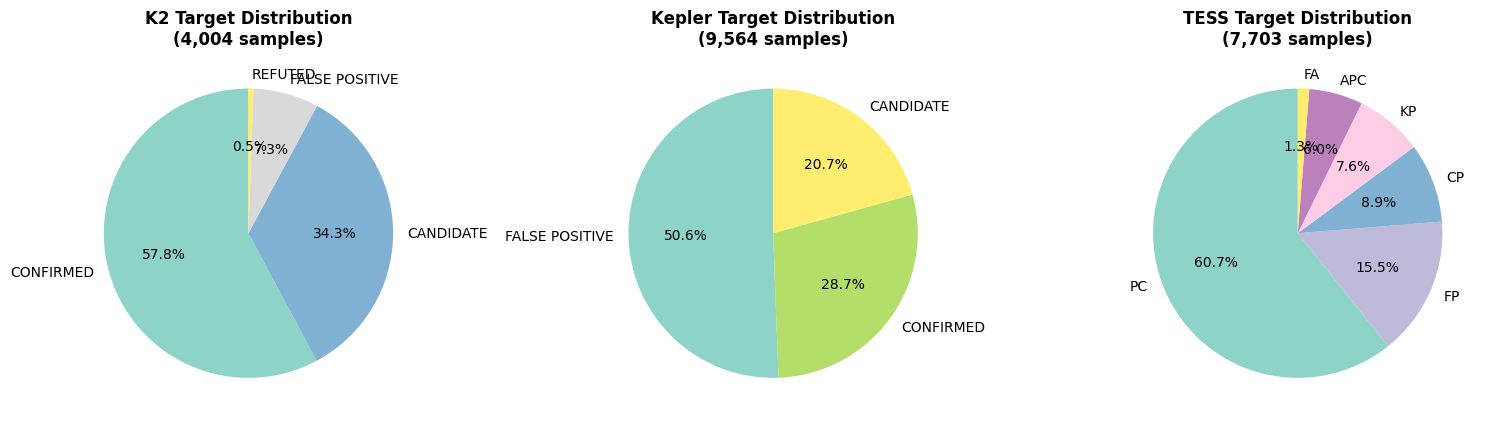

In [4]:
# 4. TARGET DISTRIBUTION ANALYSIS
print("🎯 TARGET DISTRIBUTION ANALYSIS")
print("=" * 60)

plt.figure(figsize=(15, 5))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, i)
    target_col = target_columns[name]
    
    # Get target distribution
    target_dist = df[target_col].value_counts()
    
    # Create pie chart
    colors = plt.cm.Set3(np.linspace(0, 1, len(target_dist)))
    wedges, texts, autotexts = plt.pie(target_dist.values, labels=target_dist.index, 
                                      autopct='%1.1f%%', startangle=90, colors=colors)
    
    plt.title(f'{name} Target Distribution\n({len(df):,} samples)', 
              fontsize=12, fontweight='bold')
    
    # Print detailed distribution
    print(f"\n{name} ({target_col}):")
    for category, count in target_dist.items():
        percentage = (count / len(df)) * 100
        print(f"  • {category}: {count:,} ({percentage:.1f}%)")

plt.tight_layout()
plt.show()

🔍 COMMON FEATURES ANALYSIS
📊 FEATURE OVERLAP SUMMARY:
🎯 All 3 datasets common: 3 features
🔗 K2-Kepler only: 0 features
🔗 K2-TESS only: 39 features
🔗 Kepler-TESS only: 0 features

🎯 COMMON FEATURES IN ALL 3 DATASETS (3 total):
   1. dec
   2. ra
   3. rowid


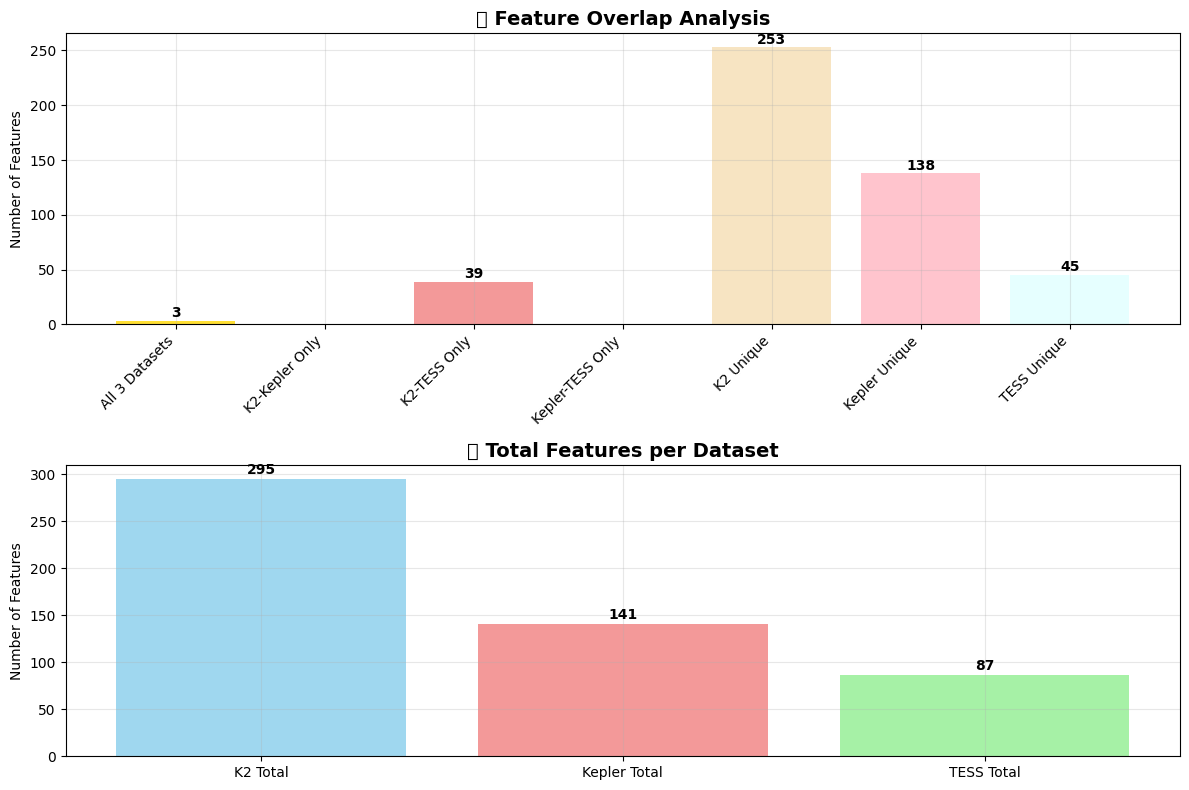

In [5]:
# 5. COMMON FEATURES ANALYSIS
print("🔍 COMMON FEATURES ANALYSIS")
print("=" * 60)

# Get column sets
k2_cols = set(k2_df.columns)
kepler_cols = set(kepler_df.columns)
tess_cols = set(tess_df.columns)

# Find common features
common_all_3 = k2_cols.intersection(kepler_cols).intersection(tess_cols)
common_k2_kepler = k2_cols.intersection(kepler_cols) - tess_cols
common_k2_tess = k2_cols.intersection(tess_cols) - kepler_cols
common_kepler_tess = kepler_cols.intersection(tess_cols) - k2_cols

print(f"📊 FEATURE OVERLAP SUMMARY:")
print(f"🎯 All 3 datasets common: {len(common_all_3)} features")
print(f"🔗 K2-Kepler only: {len(common_k2_kepler)} features")
print(f"🔗 K2-TESS only: {len(common_k2_tess)} features")
print(f"🔗 Kepler-TESS only: {len(common_kepler_tess)} features")

print(f"\n🎯 COMMON FEATURES IN ALL 3 DATASETS ({len(common_all_3)} total):")
if common_all_3:
    for i, feature in enumerate(sorted(common_all_3), 1):
        print(f"  {i:2d}. {feature}")
else:
    print("  ❌ No common features found in all three datasets")

# Visualize feature overlap
plt.figure(figsize=(12, 8))

# Venn diagram data
overlap_data = {
    'All 3 Datasets': len(common_all_3),
    'K2-Kepler Only': len(common_k2_kepler),
    'K2-TESS Only': len(common_k2_tess),
    'Kepler-TESS Only': len(common_kepler_tess),
    'K2 Unique': len(k2_cols - kepler_cols - tess_cols),
    'Kepler Unique': len(kepler_cols - k2_cols - tess_cols),
    'TESS Unique': len(tess_cols - k2_cols - kepler_cols)
}

# Create bar chart
plt.subplot(2, 1, 1)
categories = list(overlap_data.keys())
values = list(overlap_data.values())
colors = ['gold', 'skyblue', 'lightcoral', 'lightgreen', 'wheat', 'lightpink', 'lightcyan']

bars = plt.bar(categories, values, color=colors, alpha=0.8)
plt.title('📊 Feature Overlap Analysis', fontsize=14, fontweight='bold')
plt.ylabel('Number of Features')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, values):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{value}', ha='center', va='bottom', fontweight='bold')

# Total feature counts per dataset
plt.subplot(2, 1, 2)
total_features = {
    'K2 Total': len(k2_cols),
    'Kepler Total': len(kepler_cols),
    'TESS Total': len(tess_cols)
}

plt.bar(total_features.keys(), total_features.values(), 
        color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
plt.title('📈 Total Features per Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Number of Features')
plt.grid(True, alpha=0.3)

# Add value labels
for i, (name, value) in enumerate(total_features.items()):
    plt.text(i, value + 2, f'{value}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [6]:
# 6. DETAILED COMMON FEATURES ANALYSIS
print("🔍 DETAILED COMMON FEATURES ANALYSIS")
print("=" * 60)

if common_all_3:
    print(f"\n📋 ANALYZING {len(common_all_3)} COMMON FEATURES:")
    
    # Analyze data types of common features
    common_feature_analysis = []
    
    for feature in sorted(common_all_3):
        k2_dtype = str(k2_df[feature].dtype)
        kepler_dtype = str(kepler_df[feature].dtype)
        tess_dtype = str(tess_df[feature].dtype)
        
        # Check for missing values
        k2_missing = k2_df[feature].isnull().sum()
        kepler_missing = kepler_df[feature].isnull().sum()
        tess_missing = tess_df[feature].isnull().sum()
        
        common_feature_analysis.append({
            'Feature': feature,
            'K2_dtype': k2_dtype,
            'Kepler_dtype': kepler_dtype,
            'TESS_dtype': tess_dtype,
            'K2_missing': k2_missing,
            'Kepler_missing': kepler_missing,
            'TESS_missing': tess_missing,
            'Total_missing': k2_missing + kepler_missing + tess_missing
        })
    
    common_features_df = pd.DataFrame(common_feature_analysis)
    
    print("\n📊 COMMON FEATURES DATA TYPES:")
    print(common_features_df[['Feature', 'K2_dtype', 'Kepler_dtype', 'TESS_dtype']].to_string(index=False))
    
    print("\n📈 COMMON FEATURES MISSING VALUES:")
    missing_summary = common_features_df[['Feature', 'K2_missing', 'Kepler_missing', 'TESS_missing', 'Total_missing']]
    missing_summary = missing_summary[missing_summary['Total_missing'] > 0].sort_values('Total_missing', ascending=False)
    
    if not missing_summary.empty:
        print(missing_summary.to_string(index=False))
    else:
        print("✅ No missing values in common features!")
        
else:
    print("❌ No common features found across all three datasets")
    
    # Show pairwise common features instead
    print("\n🔗 PAIRWISE COMMON FEATURES:")
    
    if common_k2_kepler:
        print(f"\nK2-Kepler Common ({len(common_k2_kepler)}):")
        for feature in sorted(list(common_k2_kepler)[:10]):  # Show first 10
            print(f"  • {feature}")
        if len(common_k2_kepler) > 10:
            print(f"  ... and {len(common_k2_kepler) - 10} more")
    
    if common_k2_tess:
        print(f"\nK2-TESS Common ({len(common_k2_tess)}):")
        for feature in sorted(list(common_k2_tess)[:10]):  # Show first 10
            print(f"  • {feature}")
        if len(common_k2_tess) > 10:
            print(f"  ... and {len(common_k2_tess) - 10} more")
    
    if common_kepler_tess:
        print(f"\nKepler-TESS Common ({len(common_kepler_tess)}):")
        for feature in sorted(list(common_kepler_tess)[:10]):  # Show first 10
            print(f"  • {feature}")
        if len(common_kepler_tess) > 10:
            print(f"  ... and {len(common_kepler_tess) - 10} more")

🔍 DETAILED COMMON FEATURES ANALYSIS

📋 ANALYZING 3 COMMON FEATURES:

📊 COMMON FEATURES DATA TYPES:
Feature K2_dtype Kepler_dtype TESS_dtype
    dec  float64      float64    float64
     ra  float64      float64    float64
  rowid    int64        int64      int64

📈 COMMON FEATURES MISSING VALUES:
✅ No missing values in common features!


🏷️ FEATURE CATEGORY ANALYSIS
📊 FEATURE CATEGORIES BY DATASET:
     Category  K2_Count  Kepler_Count  TESS_Count
  Coordinates        14            22           8
  Disposition        13             7           1
   Magnitudes        54             8           0
Observational         5             8           1
      Orbital         0             9           0
        Other        28            47           6
    Planetary       129             3          36
      Stellar        51            26          35
      Transit         1            11           0


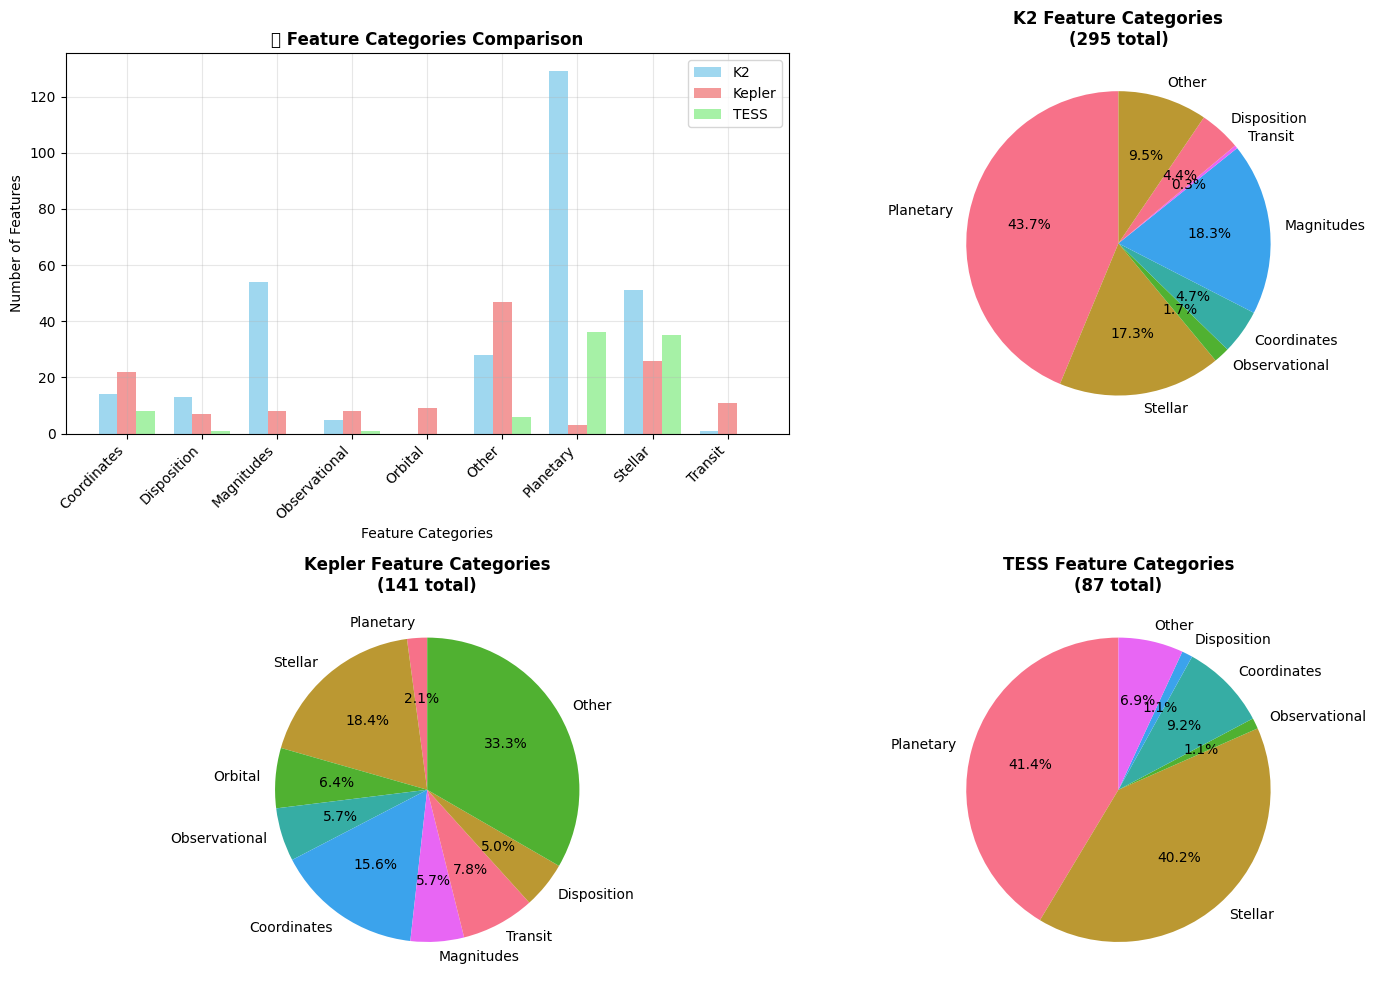


🔍 DETAILED FEATURE BREAKDOWN:

K2 Dataset:
  Planetary (129): pl_name, pl_letter, pl_controv_flag, pl_refname, pl_orbper...
  Stellar (51): hostname, epic_hostname, ast_flag, st_refname, st_spectype...
  Observational (5): disc_refname, disc_pubdate, sy_refname, rowupdate, releasedate
  Coordinates (14): rastr, ra, decstr, dec, glat...
  Magnitudes (54): sy_bmag, sy_bmagerr1, sy_bmagerr2, sy_vmag, sy_vmagerr1...
  Transit (1): tran_flag
  Disposition (13): default_flag, disposition, disp_refname, cb_flag, rv_flag...
  Other (28): rowid, k2_name, epic_candname, hd_name, hip_name...

Kepler Dataset:
  Planetary (3): koi_prad, koi_prad_err1, koi_prad_err2
  Stellar (26): koi_score, koi_srho, koi_srho_err1, koi_srho_err2, koi_sma...
  Orbital (9): koi_period, koi_period_err1, koi_period_err2, koi_eccen, koi_eccen_err1...
  Observational (8): koi_vet_date, koi_comment, koi_time0bk, koi_time0bk_err1, koi_time0bk_err2...
  Coordinates (22): ra, dec, koi_fwm_sra, koi_fwm_sra_err, koi_fwm_sdec

In [7]:
# 7. FEATURE CATEGORY ANALYSIS
print("🏷️ FEATURE CATEGORY ANALYSIS")
print("=" * 60)

def categorize_features(columns):
    """Categorize features based on their prefixes and names"""
    categories = {
        'Planetary': [],
        'Stellar': [],
        'Orbital': [],
        'Observational': [],
        'Coordinates': [],
        'Magnitudes': [],
        'Transit': [],
        'Disposition': [],
        'Other': []
    }
    
    for col in columns:
        col_lower = col.lower()
        
        if any(x in col_lower for x in ['pl_', 'planet', 'prad', 'masse', 'radius']):
            categories['Planetary'].append(col)
        elif any(x in col_lower for x in ['st_', 'stellar', 'star', 'host', 'koi_s', 'stellar']):
            categories['Stellar'].append(col)
        elif any(x in col_lower for x in ['orb', 'period', 'eccen', 'incl', 'sma']):
            categories['Orbital'].append(col)
        elif any(x in col_lower for x in ['tran', 'transit', 'depth', 'duration', 'impact']):
            categories['Transit'].append(col)
        elif any(x in col_lower for x in ['ra', 'dec', 'glon', 'glat', 'elon', 'elat']):
            categories['Coordinates'].append(col)
        elif any(x in col_lower for x in ['mag', 'magnitude', 'flux']):
            categories['Magnitudes'].append(col)
        elif any(x in col_lower for x in ['disposition', 'disp', 'flag', 'score']):
            categories['Disposition'].append(col)
        elif any(x in col_lower for x in ['date', 'time', 'update', 'ref', 'comment']):
            categories['Observational'].append(col)
        else:
            categories['Other'].append(col)
    
    return categories

# Analyze each dataset
dataset_categories = {}
for name, df in datasets.items():
    dataset_categories[name] = categorize_features(df.columns)

# Create summary
category_summary = []
all_categories = set()
for categories in dataset_categories.values():
    all_categories.update(categories.keys())

for category in sorted(all_categories):
    row = {'Category': category}
    for dataset_name in datasets.keys():
        count = len(dataset_categories[dataset_name].get(category, []))
        row[f'{dataset_name}_Count'] = count
    category_summary.append(row)

category_df = pd.DataFrame(category_summary)
print("📊 FEATURE CATEGORIES BY DATASET:")
print(category_df.to_string(index=False))

# Visualize category distribution
plt.figure(figsize=(15, 10))

# Stacked bar chart
plt.subplot(2, 2, 1)
categories = category_df['Category'].tolist()
k2_counts = category_df['K2_Count'].tolist()
kepler_counts = category_df['Kepler_Count'].tolist()
tess_counts = category_df['TESS_Count'].tolist()

x = np.arange(len(categories))
width = 0.25

plt.bar(x - width, k2_counts, width, label='K2', alpha=0.8, color='skyblue')
plt.bar(x, kepler_counts, width, label='Kepler', alpha=0.8, color='lightcoral')
plt.bar(x + width, tess_counts, width, label='TESS', alpha=0.8, color='lightgreen')

plt.xlabel('Feature Categories')
plt.ylabel('Number of Features')
plt.title('📊 Feature Categories Comparison', fontweight='bold')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Individual dataset breakdowns
for i, (name, categories) in enumerate(dataset_categories.items(), 2):
    plt.subplot(2, 2, i)
    
    # Filter out empty categories
    non_empty_categories = {k: len(v) for k, v in categories.items() if len(v) > 0}
    
    if non_empty_categories:
        plt.pie(non_empty_categories.values(), labels=non_empty_categories.keys(), 
                autopct='%1.1f%%', startangle=90)
        plt.title(f'{name} Feature Categories\n({sum(non_empty_categories.values())} total)', 
                  fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed breakdown for each dataset
print("\n🔍 DETAILED FEATURE BREAKDOWN:")
for name, categories in dataset_categories.items():
    print(f"\n{name} Dataset:")
    for category, features in categories.items():
        if features:
            print(f"  {category} ({len(features)}): {', '.join(features[:5])}{'...' if len(features) > 5 else ''}")

🎯 3-CLASS CLASSIFICATION MAPPING ANALYSIS
📋 3-CLASS MAPPING STRATEGY:

K2:
  Target Column: disposition
  Mapping:
    CANDIDATE → Candidate
    CONFIRMED → Confirmed
    FALSE POSITIVE → False_Positive

Kepler:
  Target Column: koi_disposition
  Mapping:
    CANDIDATE → Candidate
    CONFIRMED → Confirmed
    FALSE POSITIVE → False_Positive

TESS:
  Target Column: tfopwg_disp
  Mapping:
    PC → Candidate
    APC → Candidate
    CP → Confirmed
    KP → Confirmed
    FP → False_Positive
    FA → False_Positive


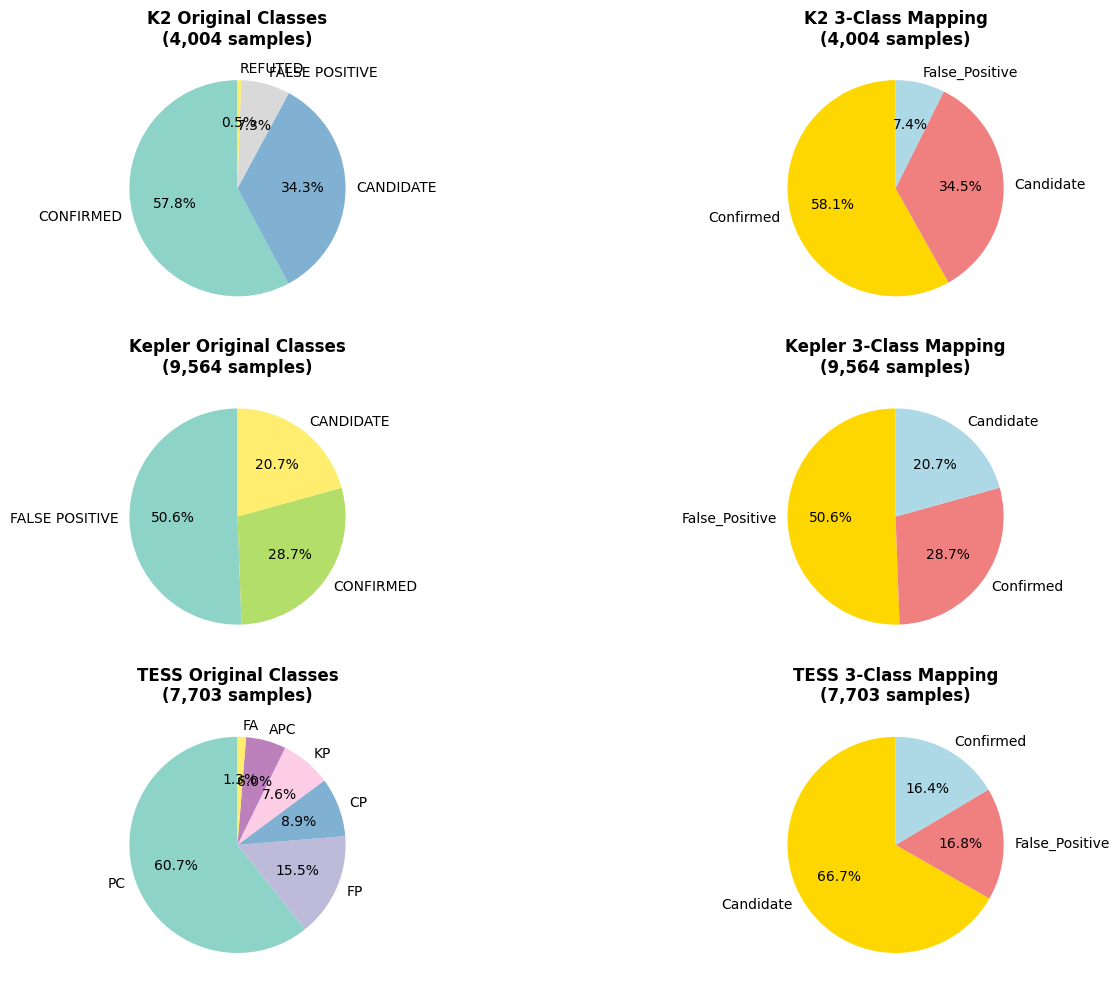


📊 3-CLASS MAPPING RESULTS:

K2:
  Original → Mapped:
    Confirmed: 2,315 (58.1%)
    Candidate: 1,374 (34.5%)
    False_Positive: 293 (7.4%)

Kepler:
  Original → Mapped:
    False_Positive: 4,839 (50.6%)
    Confirmed: 2,746 (28.7%)
    Candidate: 1,979 (20.7%)

TESS:
  Original → Mapped:
    Candidate: 5,141 (66.7%)
    False_Positive: 1,295 (16.8%)
    Confirmed: 1,267 (16.4%)

🎯 COMBINED 3-CLASS DISTRIBUTION:
  Candidate: 8,494 (40.0%)
  Confirmed: 6,328 (29.8%)
  False_Positive: 6,427 (30.2%)
  Total: 21,249 samples


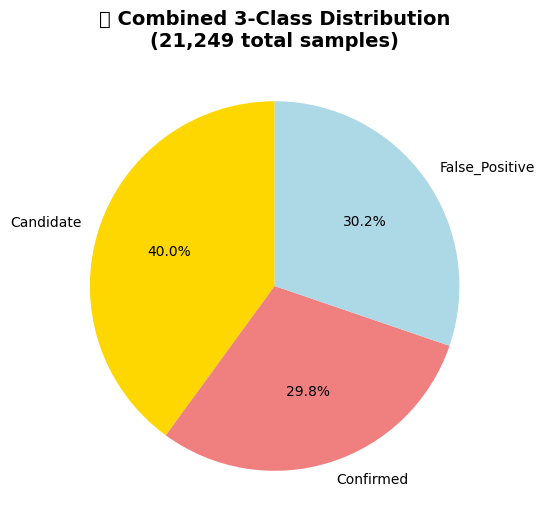

In [8]:
# 8. 3-CLASS CLASSIFICATION MAPPING ANALYSIS
print("🎯 3-CLASS CLASSIFICATION MAPPING ANALYSIS")
print("=" * 60)

# Define our 3-class mapping strategy
mapping_strategy = {
    'K2': {
        'target_column': 'disposition',
        'mapping': {
            'CANDIDATE': 'Candidate',
            'CONFIRMED': 'Confirmed', 
            'FALSE POSITIVE': 'False_Positive'
        }
    },
    'Kepler': {
        'target_column': 'koi_disposition',
        'mapping': {
            'CANDIDATE': 'Candidate',
            'CONFIRMED': 'Confirmed',
            'FALSE POSITIVE': 'False_Positive'
        }
    },
    'TESS': {
        'target_column': 'tfopwg_disp',
        'mapping': {
            'PC': 'Candidate',      # Planet Candidate
            'APC': 'Candidate',     # Ambiguous Planet Candidate
            'CP': 'Confirmed',      # Confirmed Planet
            'KP': 'Confirmed',      # Known Planet
            'FP': 'False_Positive', # False Positive
            'FA': 'False_Positive'  # False Alarm
        }
    }
}

print("📋 3-CLASS MAPPING STRATEGY:")
for dataset, info in mapping_strategy.items():
    print(f"\n{dataset}:")
    print(f"  Target Column: {info['target_column']}")
    print(f"  Mapping:")
    for original, mapped in info['mapping'].items():
        print(f"    {original} → {mapped}")

# Apply mapping and analyze
mapped_distributions = {}

plt.figure(figsize=(15, 10))

for i, (dataset_name, df) in enumerate(datasets.items(), 1):
    info = mapping_strategy[dataset_name]
    target_col = info['target_column']
    mapping = info['mapping']
    
    # Apply mapping
    df_mapped = df.copy()
    df_mapped['mapped_class'] = df_mapped[target_col].map(mapping)
    
    # Get distribution
    original_dist = df[target_col].value_counts()
    mapped_dist = df_mapped['mapped_class'].value_counts()
    
    mapped_distributions[dataset_name] = {
        'original': original_dist,
        'mapped': mapped_dist
    }
    
    # Plot original distribution
    plt.subplot(3, 2, 2*i-1)
    colors = plt.cm.Set3(np.linspace(0, 1, len(original_dist)))
    plt.pie(original_dist.values, labels=original_dist.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
    plt.title(f'{dataset_name} Original Classes\n({len(df):,} samples)', fontweight='bold')
    
    # Plot mapped distribution
    plt.subplot(3, 2, 2*i)
    colors_mapped = ['gold', 'lightcoral', 'lightblue']
    plt.pie(mapped_dist.values, labels=mapped_dist.index, autopct='%1.1f%%', 
            startangle=90, colors=colors_mapped)
    plt.title(f'{dataset_name} 3-Class Mapping\n({len(df):,} samples)', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed mapping results
print("\n📊 3-CLASS MAPPING RESULTS:")
total_mapped_dist = {'Candidate': 0, 'Confirmed': 0, 'False_Positive': 0}

for dataset_name, distributions in mapped_distributions.items():
    print(f"\n{dataset_name}:")
    print(f"  Original → Mapped:")
    
    original = distributions['original']
    mapped = distributions['mapped']
    
    for class_name in mapped.index:
        count = mapped[class_name]
        percentage = (count / mapped.sum()) * 100
        print(f"    {class_name}: {count:,} ({percentage:.1f}%)")
        total_mapped_dist[class_name] += count

# Overall 3-class distribution
print(f"\n🎯 COMBINED 3-CLASS DISTRIBUTION:")
total_samples = sum(total_mapped_dist.values())
for class_name, count in total_mapped_dist.items():
    percentage = (count / total_samples) * 100
    print(f"  {class_name}: {count:,} ({percentage:.1f}%)")
print(f"  Total: {total_samples:,} samples")

# Visualize combined distribution
plt.figure(figsize=(8, 6))
colors = ['gold', 'lightcoral', 'lightblue']
plt.pie(total_mapped_dist.values(), labels=total_mapped_dist.keys(), 
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'🎯 Combined 3-Class Distribution\n({total_samples:,} total samples)', 
          fontsize=14, fontweight='bold')
plt.show()

❓ MISSING VALUES ANALYSIS


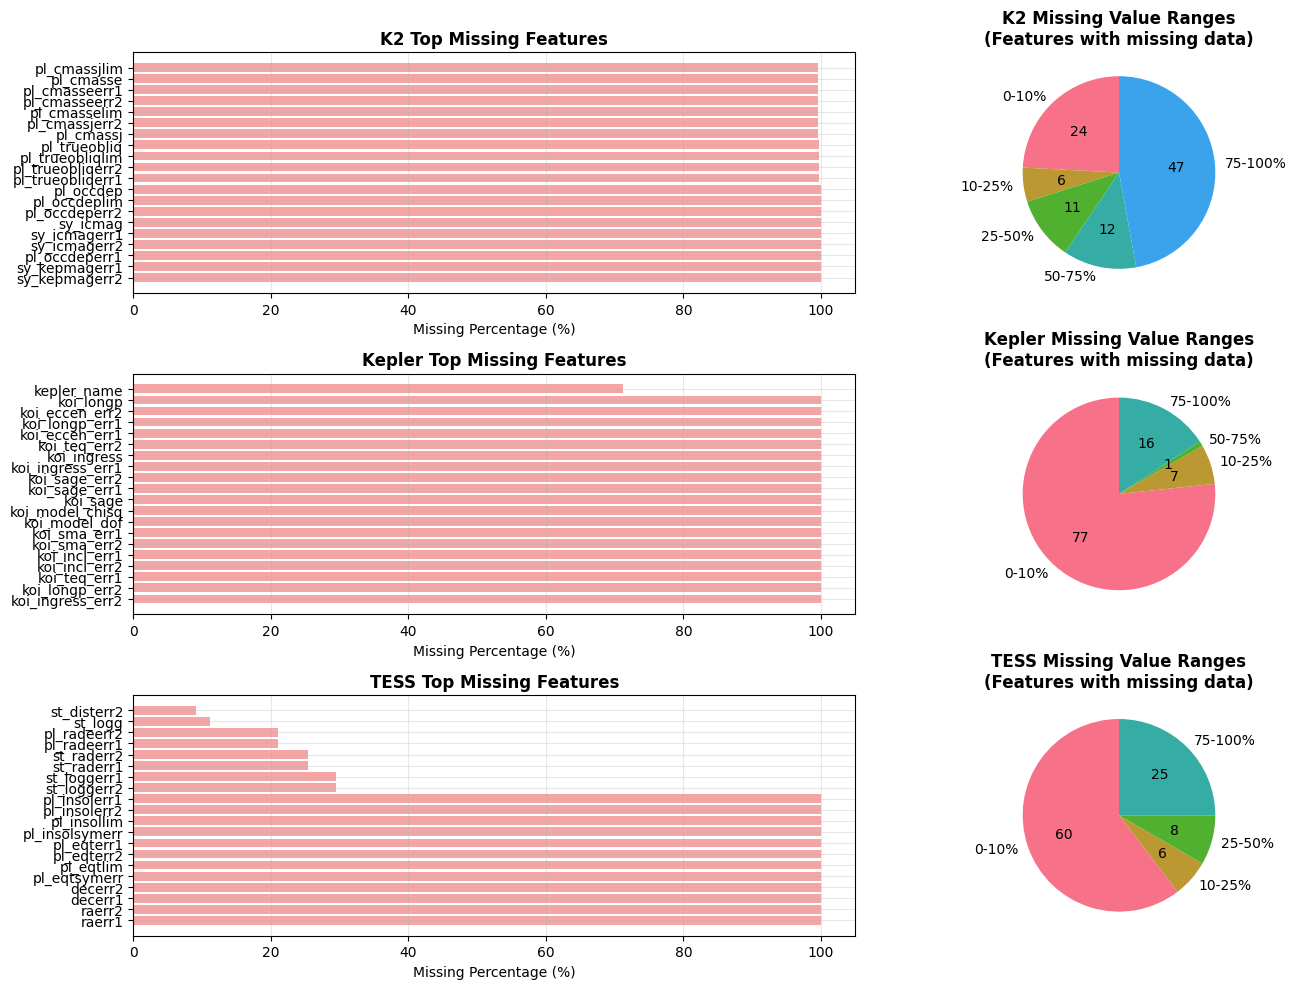


📊 MISSING VALUES SUMMARY:
Dataset  Total_Missing  Features_With_Missing  Avg_Missing_Percentage  Max_Missing_Percentage
     K2         549418                    244               46.514333                   100.0
 Kepler         237112                    120               17.583076                   100.0
   TESS         111013                     48               16.565124                   100.0

🔍 DETAILED MISSING VALUES:

K2 - Top 10 features with missing values:
  • sy_kepmagerr2: 4,004 (100.0%)
  • sy_kepmagerr1: 4,004 (100.0%)
  • pl_occdeperr1: 4,004 (100.0%)
  • sy_icmagerr2: 4,004 (100.0%)
  • sy_icmagerr1: 4,004 (100.0%)
  • sy_icmag: 4,004 (100.0%)
  • pl_occdeperr2: 4,004 (100.0%)
  • pl_occdeplim: 4,003 (100.0%)
  • pl_occdep: 4,003 (100.0%)
  • pl_trueobliqerr1: 3,994 (99.8%)

Kepler - Top 10 features with missing values:
  • koi_ingress_err2: 9,564 (100.0%)
  • koi_longp_err2: 9,564 (100.0%)
  • koi_teq_err1: 9,564 (100.0%)
  • koi_incl_err2: 9,564 (100.0%)
  • koi_in

In [9]:
# 9. MISSING VALUES ANALYSIS
print("❓ MISSING VALUES ANALYSIS")
print("=" * 60)

plt.figure(figsize=(15, 10))

missing_summary = []

for i, (name, df) in enumerate(datasets.items(), 1):
    # Calculate missing values
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    
    # Filter features with missing values
    features_with_missing = missing_counts[missing_counts > 0].sort_values(ascending=False)
    
    missing_summary.append({
        'Dataset': name,
        'Total_Missing': missing_counts.sum(),
        'Features_With_Missing': len(features_with_missing),
        'Avg_Missing_Percentage': missing_percentages.mean(),
        'Max_Missing_Percentage': missing_percentages.max()
    })
    
    # Plot missing values heatmap for top features
    plt.subplot(3, 2, 2*i-1)
    top_missing = features_with_missing.head(20) if len(features_with_missing) > 0 else pd.Series()
    
    if not top_missing.empty:
        top_missing_pct = (top_missing / len(df)) * 100
        plt.barh(range(len(top_missing)), top_missing_pct.values, color='lightcoral', alpha=0.7)
        plt.yticks(range(len(top_missing)), 
                   [f"{feat[:20]}..." if len(feat) > 20 else feat for feat in top_missing.index])
        plt.xlabel('Missing Percentage (%)')
        plt.title(f'{name} Top Missing Features', fontweight='bold')
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                 transform=plt.gca().transAxes, fontsize=14)
        plt.title(f'{name} Missing Values', fontweight='bold')
    
    # Plot missing values distribution
    plt.subplot(3, 2, 2*i)
    if not top_missing.empty:
        missing_ranges = {
            '0-10%': len(missing_percentages[(missing_percentages > 0) & (missing_percentages <= 10)]),
            '10-25%': len(missing_percentages[(missing_percentages > 10) & (missing_percentages <= 25)]),
            '25-50%': len(missing_percentages[(missing_percentages > 25) & (missing_percentages <= 50)]),
            '50-75%': len(missing_percentages[(missing_percentages > 50) & (missing_percentages <= 75)]),
            '75-100%': len(missing_percentages[missing_percentages > 75])
        }
        
        # Filter out zero values
        missing_ranges = {k: v for k, v in missing_ranges.items() if v > 0}
        
        if missing_ranges:
            plt.pie(missing_ranges.values(), labels=missing_ranges.keys(), 
                    autopct='%1.0f', startangle=90)
            plt.title(f'{name} Missing Value Ranges\n(Features with missing data)', fontweight='bold')
        else:
            plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                     transform=plt.gca().transAxes, fontsize=14)
            plt.title(f'{name} Missing Ranges', fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                 transform=plt.gca().transAxes, fontsize=14)
        plt.title(f'{name} Missing Ranges', fontweight='bold')

plt.tight_layout()
plt.show()

# Print missing values summary
missing_df = pd.DataFrame(missing_summary)
print("\n📊 MISSING VALUES SUMMARY:")
print(missing_df.to_string(index=False))

# Detailed missing values for each dataset
print("\n🔍 DETAILED MISSING VALUES:")
for name, df in datasets.items():
    missing_counts = df.isnull().sum()
    features_with_missing = missing_counts[missing_counts > 0].sort_values(ascending=False)
    
    print(f"\n{name} - Top 10 features with missing values:")
    if not features_with_missing.empty:
        for feature, count in features_with_missing.head(10).items():
            percentage = (count / len(df)) * 100
            print(f"  • {feature}: {count:,} ({percentage:.1f}%)")
    else:
        print("  ✅ No missing values!")

In [10]:
# 10. FINAL SUMMARY AND RECOMMENDATIONS
print("🎊 FINAL SUMMARY AND RECOMMENDATIONS")
print("=" * 60)

print("📋 DATASET COMPARISON SUMMARY:")
print("\n🔢 SIZE COMPARISON:")
for name, df in datasets.items():
    print(f"  • {name}: {len(df):,} samples, {len(df.columns)} features")

print("\n🎯 TARGET DISTRIBUTION:")
for dataset_name in datasets.keys():
    mapped_dist = mapped_distributions[dataset_name]['mapped']
    print(f"  • {dataset_name}: Candidate={mapped_dist.get('Candidate', 0):,}, "
          f"Confirmed={mapped_dist.get('Confirmed', 0):,}, "
          f"False_Positive={mapped_dist.get('False_Positive', 0):,}")

print(f"\n🔗 FEATURE OVERLAP:")
print(f"  • Common to all 3: {len(common_all_3)} features")
print(f"  • K2-Kepler: {len(common_k2_kepler)} features")
print(f"  • K2-TESS: {len(common_k2_tess)} features")
print(f"  • Kepler-TESS: {len(common_kepler_tess)} features")

print("\n📊 KEY FINDINGS:")
print("\n✅ SIMILARITIES:")
print("  • All use transit photometry for exoplanet detection")
print("  • Similar target classification categories (Candidate/Confirmed/False Positive)")
print("  • Share fundamental astronomical measurements (coordinates, magnitudes)")
print("  • Common planetary parameters (period, radius, transit depth)")
print("  • Stellar characterization features (temperature, mass, radius)")

print("\n🔄 DIFFERENCES:")
print("  • K2: Extended Kepler mission with different fields")
print("  • Kepler: Focused on single field, longest time baseline")
print("  • TESS: All-sky survey, shorter but more frequent observations")
print("  • Different feature schemas and naming conventions")
print("  • Varying levels of data completeness and processing")

print("\n🚀 RECOMMENDATIONS FOR ML PIPELINE:")
print("\n1. 📈 UNIFIED 3-CLASS APPROACH:")
print("   • Use consistent Candidate/Confirmed/False_Positive mapping")
print("   • Handle class imbalance with appropriate techniques")
print("   • Cross-validate models across different datasets")

print("\n2. 🔧 FEATURE ENGINEERING:")
print("   • Focus on common astronomical features across datasets")
print("   • Create mission-agnostic feature representations")
print("   • Handle missing values with domain-specific imputation")

print("\n3. 🎯 MODEL STRATEGY:")
print("   • Train dataset-specific models for best performance")
print("   • Develop transfer learning approaches for cross-mission prediction")
print("   • Use ensemble methods to combine mission-specific expertise")

print("\n4. 📊 VALIDATION APPROACH:")
print("   • Test model generalization across different missions")
print("   • Validate on recent confirmed discoveries")
print("   • Monitor performance on different stellar types and planets")

print("\n🎊 CONCLUSION:")
print("The three datasets represent complementary views of exoplanet discovery,")
print("each with unique strengths. A unified approach leveraging all three")
print("can provide robust exoplanet classification capabilities across")
print("different observational contexts and target types.")

print("\n✅ Analysis completed successfully!")
print(f"📈 Total analyzed: {sum(len(df) for df in datasets.values()):,} exoplanet observations")
print(f"🎯 Ready for unified ML pipeline development!")

🎊 FINAL SUMMARY AND RECOMMENDATIONS
📋 DATASET COMPARISON SUMMARY:

🔢 SIZE COMPARISON:
  • K2: 4,004 samples, 295 features
  • Kepler: 9,564 samples, 141 features
  • TESS: 7,703 samples, 87 features

🎯 TARGET DISTRIBUTION:
  • K2: Candidate=1,374, Confirmed=2,315, False_Positive=293
  • Kepler: Candidate=1,979, Confirmed=2,746, False_Positive=4,839
  • TESS: Candidate=5,141, Confirmed=1,267, False_Positive=1,295

🔗 FEATURE OVERLAP:
  • Common to all 3: 3 features
  • K2-Kepler: 0 features
  • K2-TESS: 39 features
  • Kepler-TESS: 0 features

📊 KEY FINDINGS:

✅ SIMILARITIES:
  • All use transit photometry for exoplanet detection
  • Similar target classification categories (Candidate/Confirmed/False Positive)
  • Share fundamental astronomical measurements (coordinates, magnitudes)
  • Common planetary parameters (period, radius, transit depth)
  • Stellar characterization features (temperature, mass, radius)

🔄 DIFFERENCES:
  • K2: Extended Kepler mission with different fields
  • Kepl

🧹 FEATURE CLEANING ANALYSIS

📊 CLEANING K2 DATASET:
🔢 Original features: 295
❌ High missing value columns (>95.0%): 47
   • hd_name: 97.3% missing
   • hip_name: 96.6% missing
   • pl_msinie: 99.2% missing
   • pl_msinieerr1: 99.2% missing
   • pl_msinieerr2: 99.2% missing
   ... and 42 more
❌ Constant value columns: 25
   • sy_mnum: 1 unique value(s)
   • cb_flag: 1 unique value(s)
   • pul_flag: 1 unique value(s)
   • ptv_flag: 1 unique value(s)
   • ast_flag: 1 unique value(s)
   ... and 20 more
❌ Low variance columns (variance ≤ 0.0): 0
✅ Remaining useful features: 223
📉 Removed: 72 (24.4%)

📊 CLEANING Kepler DATASET:
🔢 Original features: 141
❌ High missing value columns (>95.0%): 19
   • koi_eccen_err1: 100.0% missing
   • koi_eccen_err2: 100.0% missing
   • koi_longp: 100.0% missing
   • koi_longp_err1: 100.0% missing
   • koi_longp_err2: 100.0% missing
   ... and 14 more
❌ Constant value columns: 8
   • koi_vet_stat: 1 unique value(s)
   • koi_vet_date: 1 unique value(s)
   • ko

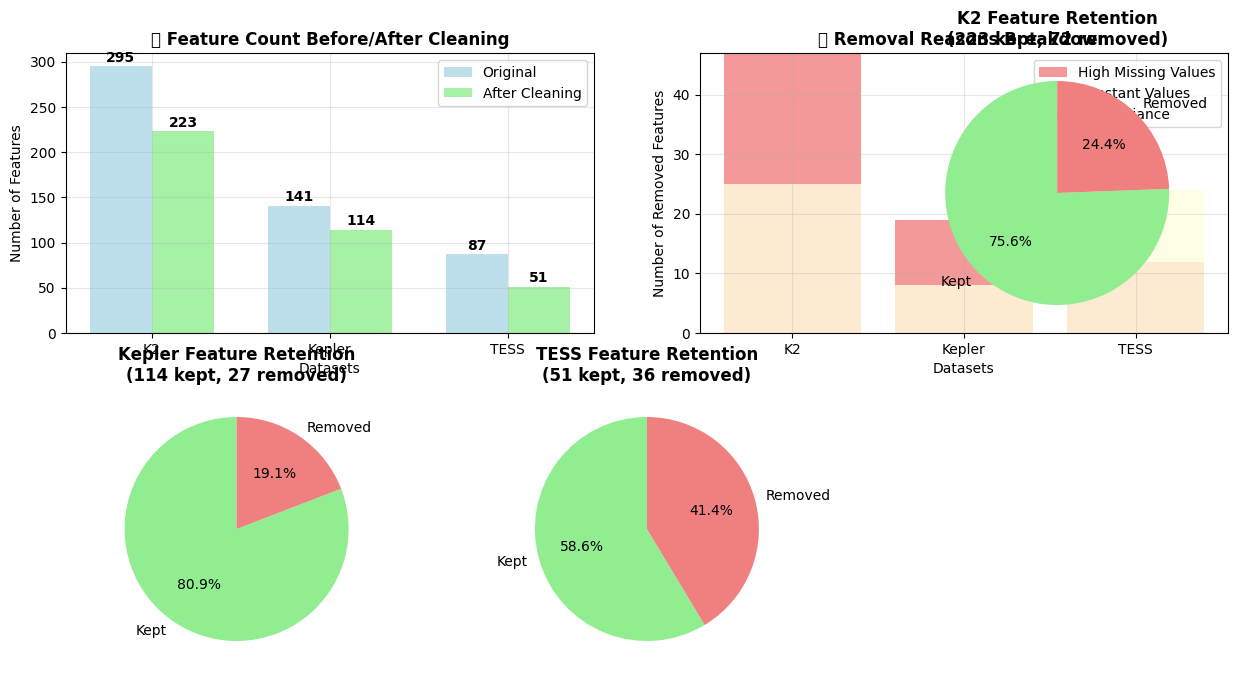

In [11]:
# 11. FEATURE CLEANING ANALYSIS - MISSING VALUES & CONSTANT COLUMNS
print("🧹 FEATURE CLEANING ANALYSIS")
print("=" * 60)

def clean_dataset_features(df, dataset_name, missing_threshold=0.95, variance_threshold=0.0):
    """
    Clean dataset by removing:
    1. Columns with high missing value percentage
    2. Columns with constant values (zero variance)
    3. Columns with very low variance
    """
    print(f"\n📊 CLEANING {dataset_name} DATASET:")
    print(f"🔢 Original features: {len(df.columns)}")
    
    # 1. Remove columns with high missing values
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    high_missing_cols = missing_percentages[missing_percentages > missing_threshold * 100].index.tolist()
    
    print(f"❌ High missing value columns (>{missing_threshold*100}%): {len(high_missing_cols)}")
    if high_missing_cols:
        for col in high_missing_cols[:5]:  # Show first 5
            pct = missing_percentages[col]
            print(f"   • {col}: {pct:.1f}% missing")
        if len(high_missing_cols) > 5:
            print(f"   ... and {len(high_missing_cols) - 5} more")
    
    # 2. Remove constant columns (same value for all rows)
    constant_cols = []
    for col in df.columns:
        if col not in high_missing_cols:  # Skip already marked for removal
            # For numeric columns
            if df[col].dtype in ['int64', 'float64']:
                if df[col].nunique() <= 1:
                    constant_cols.append(col)
            # For object columns
            else:
                non_null_values = df[col].dropna()
                if len(non_null_values) > 0 and non_null_values.nunique() <= 1:
                    constant_cols.append(col)
    
    print(f"❌ Constant value columns: {len(constant_cols)}")
    if constant_cols:
        for col in constant_cols[:5]:  # Show first 5
            unique_vals = df[col].nunique()
            print(f"   • {col}: {unique_vals} unique value(s)")
        if len(constant_cols) > 5:
            print(f"   ... and {len(constant_cols) - 5} more")
    
    # 3. Check for very low variance numeric columns
    low_variance_cols = []
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if col not in high_missing_cols and col not in constant_cols:
            col_data = df[col].dropna()
            if len(col_data) > 1:
                variance = col_data.var()
                if variance <= variance_threshold:
                    low_variance_cols.append(col)
    
    print(f"❌ Low variance columns (variance ≤ {variance_threshold}): {len(low_variance_cols)}")
    if low_variance_cols:
        for col in low_variance_cols[:5]:  # Show first 5
            variance = df[col].dropna().var()
            print(f"   • {col}: variance = {variance:.6f}")
        if len(low_variance_cols) > 5:
            print(f"   ... and {len(low_variance_cols) - 5} more")
    
    # Combine all columns to remove
    cols_to_remove = set(high_missing_cols + constant_cols + low_variance_cols)
    remaining_cols = [col for col in df.columns if col not in cols_to_remove]
    
    print(f"✅ Remaining useful features: {len(remaining_cols)}")
    print(f"📉 Removed: {len(cols_to_remove)} ({len(cols_to_remove)/len(df.columns)*100:.1f}%)")
    
    return {
        'original_columns': list(df.columns),
        'remaining_columns': remaining_cols,
        'removed_columns': list(cols_to_remove),
        'high_missing': high_missing_cols,
        'constant': constant_cols,
        'low_variance': low_variance_cols,
        'removal_stats': {
            'total_removed': len(cols_to_remove),
            'removal_percentage': len(cols_to_remove)/len(df.columns)*100,
            'remaining_count': len(remaining_cols)
        }
    }

# Clean each dataset
cleaning_results = {}
for name, df in datasets.items():
    cleaning_results[name] = clean_dataset_features(df, name, missing_threshold=0.95)

print(f"\n📊 CLEANING SUMMARY:")
print("-" * 60)
summary_data = []
for name, results in cleaning_results.items():
    summary_data.append({
        'Dataset': name,
        'Original_Features': len(results['original_columns']),
        'Removed_Features': results['removal_stats']['total_removed'],
        'Remaining_Features': results['removal_stats']['remaining_count'],
        'Removal_Percentage': f"{results['removal_stats']['removal_percentage']:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Visualize cleaning results
plt.figure(figsize=(15, 8))

# Removal breakdown
plt.subplot(2, 2, 1)
datasets_names = list(cleaning_results.keys())
original_counts = [len(results['original_columns']) for results in cleaning_results.values()]
remaining_counts = [results['removal_stats']['remaining_count'] for results in cleaning_results.values()]
removed_counts = [results['removal_stats']['total_removed'] for results in cleaning_results.values()]

x = np.arange(len(datasets_names))
width = 0.35

plt.bar(x - width/2, original_counts, width, label='Original', alpha=0.8, color='lightblue')
plt.bar(x + width/2, remaining_counts, width, label='After Cleaning', alpha=0.8, color='lightgreen')

plt.xlabel('Datasets')
plt.ylabel('Number of Features')
plt.title('🧹 Feature Count Before/After Cleaning', fontweight='bold')
plt.xticks(x, datasets_names)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels
for i, (orig, remain) in enumerate(zip(original_counts, remaining_counts)):
    plt.text(i - width/2, orig + 2, f'{orig}', ha='center', va='bottom', fontweight='bold')
    plt.text(i + width/2, remain + 2, f'{remain}', ha='center', va='bottom', fontweight='bold')

# Removal reasons breakdown
plt.subplot(2, 2, 2)
removal_reasons = {'High Missing': [], 'Constant Values': [], 'Low Variance': []}

for name, results in cleaning_results.items():
    removal_reasons['High Missing'].append(len(results['high_missing']))
    removal_reasons['Constant Values'].append(len(results['constant']))
    removal_reasons['Low Variance'].append(len(results['low_variance']))

bottom_high = np.zeros(len(datasets_names))
bottom_const = np.array(removal_reasons['High Missing'])
bottom_low = bottom_const + np.array(removal_reasons['Constant Values'])

plt.bar(datasets_names, removal_reasons['High Missing'], label='High Missing Values', 
        color='lightcoral', alpha=0.8)
plt.bar(datasets_names, removal_reasons['Constant Values'], bottom=bottom_high, 
        label='Constant Values', color='lightyellow', alpha=0.8)
plt.bar(datasets_names, removal_reasons['Low Variance'], bottom=bottom_const, 
        label='Low Variance', color='lightpink', alpha=0.8)

plt.xlabel('Datasets')
plt.ylabel('Number of Removed Features')
plt.title('📉 Removal Reasons Breakdown', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Pie chart for each dataset
for i, (name, results) in enumerate(cleaning_results.items(), 3):
    plt.subplot(2, 3, i)
    
    kept = results['removal_stats']['remaining_count']
    removed = results['removal_stats']['total_removed']
    
    if removed > 0:
        plt.pie([kept, removed], labels=['Kept', 'Removed'], 
                autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
        plt.title(f'{name} Feature Retention\n({kept} kept, {removed} removed)', fontweight='bold')
    else:
        plt.pie([kept], labels=['All Kept'], autopct='%1.1f%%', 
                startangle=90, colors=['lightgreen'])
        plt.title(f'{name} Feature Retention\n(All {kept} features kept)', fontweight='bold')

plt.tight_layout()
plt.show()

🔍 CLEANED COMMON FEATURES ANALYSIS
📊 CLEANED FEATURE OVERLAP SUMMARY:
🎯 All 3 datasets common (cleaned): 3 features
🔗 K2-Kepler only (cleaned): 0 features
🔗 K2-TESS only (cleaned): 26 features
🔗 Kepler-TESS only (cleaned): 0 features

📈 COMPARISON: ORIGINAL vs CLEANED OVERLAP:
Overlap Type         Original   Cleaned    Change    
--------------------------------------------------
All 3 datasets       3          3          0+++++++++
K2-Kepler only       0          0          0+++++++++
K2-TESS only         39         26         -13+++++++
Kepler-TESS only     0          0          0+++++++++

🎯 CLEANED COMMON FEATURES IN ALL 3 DATASETS (3 total):
   1. dec
   2. ra
   3. rowid

🏷️ CLEANED COMMON FEATURES BY CATEGORY:
  Coordinates (2): ra, dec
  Other (1): rowid

🔗 CLEANED PAIRWISE COMMON FEATURES:

K2-TESS Common (cleaned, 26):
  Planetary (14): pl_trandeperr2, pl_tranmiderr1, pl_tranmiderr2, pl_orbpererr1, pl_radeerr1...
  Stellar (9): st_loggerr2, st_tefferr1, st_teff, st_rad, st_lo

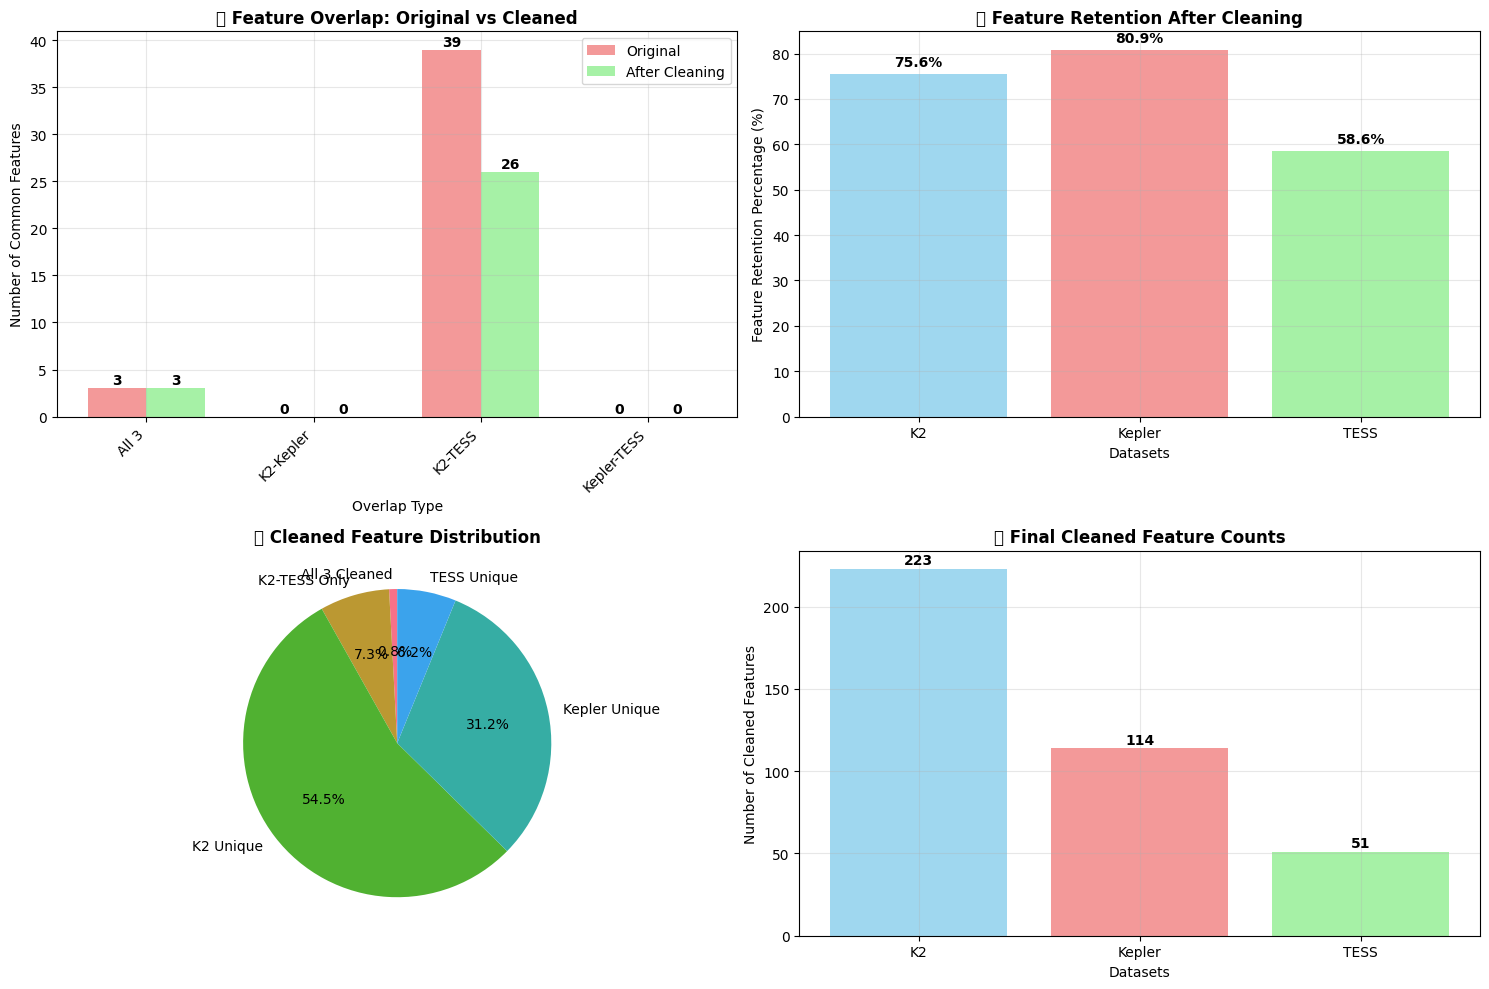


🎊 CLEANED FEATURES FINAL SUMMARY:
📊 Cleaned dataset sizes:
  • K2: 223 features (was 295, 75.6% retained)
  • Kepler: 114 features (was 141, 80.9% retained)
  • TESS: 51 features (was 87, 58.6% retained)

🔗 Cleaned common features:
  • All 3 datasets: 3 features
  • Any 2 datasets: 26 features
  • Total unique features across all cleaned datasets: 356

✅ Feature cleaning analysis completed!


In [12]:
# 12. CLEANED COMMON FEATURES ANALYSIS
print("🔍 CLEANED COMMON FEATURES ANALYSIS")
print("=" * 60)

# Get cleaned column sets
k2_cleaned_cols = set(cleaning_results['K2']['remaining_columns'])
kepler_cleaned_cols = set(cleaning_results['Kepler']['remaining_columns'])
tess_cleaned_cols = set(cleaning_results['TESS']['remaining_columns'])

# Find common features after cleaning
cleaned_common_all_3 = k2_cleaned_cols.intersection(kepler_cleaned_cols).intersection(tess_cleaned_cols)
cleaned_common_k2_kepler = k2_cleaned_cols.intersection(kepler_cleaned_cols) - tess_cleaned_cols
cleaned_common_k2_tess = k2_cleaned_cols.intersection(tess_cleaned_cols) - kepler_cleaned_cols
cleaned_common_kepler_tess = kepler_cleaned_cols.intersection(tess_cleaned_cols) - k2_cleaned_cols

print(f"📊 CLEANED FEATURE OVERLAP SUMMARY:")
print(f"🎯 All 3 datasets common (cleaned): {len(cleaned_common_all_3)} features")
print(f"🔗 K2-Kepler only (cleaned): {len(cleaned_common_k2_kepler)} features")
print(f"🔗 K2-TESS only (cleaned): {len(cleaned_common_k2_tess)} features")
print(f"🔗 Kepler-TESS only (cleaned): {len(cleaned_common_kepler_tess)} features")

# Compare with original overlap
print(f"\n📈 COMPARISON: ORIGINAL vs CLEANED OVERLAP:")
print(f"{'Overlap Type':<20} {'Original':<10} {'Cleaned':<10} {'Change':<10}")
print("-" * 50)
print(f"{'All 3 datasets':<20} {len(common_all_3):<10} {len(cleaned_common_all_3):<10} {len(cleaned_common_all_3) - len(common_all_3):+<10}")
print(f"{'K2-Kepler only':<20} {len(common_k2_kepler):<10} {len(cleaned_common_k2_kepler):<10} {len(cleaned_common_k2_kepler) - len(common_k2_kepler):+<10}")
print(f"{'K2-TESS only':<20} {len(common_k2_tess):<10} {len(cleaned_common_k2_tess):<10} {len(cleaned_common_k2_tess) - len(common_k2_tess):+<10}")
print(f"{'Kepler-TESS only':<20} {len(common_kepler_tess):<10} {len(cleaned_common_kepler_tess):<10} {len(cleaned_common_kepler_tess) - len(common_kepler_tess):+<10}")

# Show cleaned common features
print(f"\n🎯 CLEANED COMMON FEATURES IN ALL 3 DATASETS ({len(cleaned_common_all_3)} total):")
if cleaned_common_all_3:
    for i, feature in enumerate(sorted(cleaned_common_all_3), 1):
        print(f"  {i:2d}. {feature}")
else:
    print("  ❌ No common features found in all three cleaned datasets")

# Analyze by feature category for cleaned features
print(f"\n🏷️ CLEANED COMMON FEATURES BY CATEGORY:")
if cleaned_common_all_3:
    cleaned_categories = categorize_features(list(cleaned_common_all_3))
    for category, features in cleaned_categories.items():
        if features:
            print(f"  {category} ({len(features)}): {', '.join(features)}")

# Show pairwise common features
print(f"\n🔗 CLEANED PAIRWISE COMMON FEATURES:")

if cleaned_common_k2_kepler:
    print(f"\nK2-Kepler Common (cleaned, {len(cleaned_common_k2_kepler)}):")
    k2_kepler_categories = categorize_features(list(cleaned_common_k2_kepler))
    for category, features in k2_kepler_categories.items():
        if features:
            print(f"  {category} ({len(features)}): {', '.join(features[:5])}{'...' if len(features) > 5 else ''}")

if cleaned_common_k2_tess:
    print(f"\nK2-TESS Common (cleaned, {len(cleaned_common_k2_tess)}):")
    k2_tess_categories = categorize_features(list(cleaned_common_k2_tess))
    for category, features in k2_tess_categories.items():
        if features:
            print(f"  {category} ({len(features)}): {', '.join(features[:5])}{'...' if len(features) > 5 else ''}")

if cleaned_common_kepler_tess:
    print(f"\nKepler-TESS Common (cleaned, {len(cleaned_common_kepler_tess)}):")
    kepler_tess_categories = categorize_features(list(cleaned_common_kepler_tess))
    for category, features in kepler_tess_categories.items():
        if features:
            print(f"  {category} ({len(features)}): {', '.join(features[:5])}{'...' if len(features) > 5 else ''}")

# Visualize cleaned feature overlap
plt.figure(figsize=(15, 10))

# Cleaned overlap comparison
plt.subplot(2, 2, 1)
categories = ['All 3', 'K2-Kepler', 'K2-TESS', 'Kepler-TESS']
original_counts = [len(common_all_3), len(common_k2_kepler), len(common_k2_tess), len(common_kepler_tess)]
cleaned_counts = [len(cleaned_common_all_3), len(cleaned_common_k2_kepler), len(cleaned_common_k2_tess), len(cleaned_common_kepler_tess)]

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, original_counts, width, label='Original', alpha=0.8, color='lightcoral')
plt.bar(x + width/2, cleaned_counts, width, label='After Cleaning', alpha=0.8, color='lightgreen')

plt.xlabel('Overlap Type')
plt.ylabel('Number of Common Features')
plt.title('🔍 Feature Overlap: Original vs Cleaned', fontweight='bold')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels
for i, (orig, clean) in enumerate(zip(original_counts, cleaned_counts)):
    plt.text(i - width/2, orig + 0.1, f'{orig}', ha='center', va='bottom', fontweight='bold')
    plt.text(i + width/2, clean + 0.1, f'{clean}', ha='center', va='bottom', fontweight='bold')

# Cleaned feature retention per dataset
plt.subplot(2, 2, 2)
retention_percentages = []
dataset_names = []

for name, results in cleaning_results.items():
    retention_pct = (results['removal_stats']['remaining_count'] / len(results['original_columns'])) * 100
    retention_percentages.append(retention_pct)
    dataset_names.append(name)

bars = plt.bar(dataset_names, retention_percentages, color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
plt.xlabel('Datasets')
plt.ylabel('Feature Retention Percentage (%)')
plt.title('📊 Feature Retention After Cleaning', fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars, retention_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Venn diagram style visualization for cleaned common features
plt.subplot(2, 2, 3)
cleaned_overlap_data = {
    'All 3 Cleaned': len(cleaned_common_all_3),
    'K2-Kepler Only': len(cleaned_common_k2_kepler),
    'K2-TESS Only': len(cleaned_common_k2_tess),
    'Kepler-TESS Only': len(cleaned_common_kepler_tess),
    'K2 Unique': len(k2_cleaned_cols - kepler_cleaned_cols - tess_cleaned_cols),
    'Kepler Unique': len(kepler_cleaned_cols - k2_cleaned_cols - tess_cleaned_cols),
    'TESS Unique': len(tess_cleaned_cols - k2_cleaned_cols - kepler_cleaned_cols)
}

# Filter out zero values
non_zero_overlap = {k: v for k, v in cleaned_overlap_data.items() if v > 0}

if non_zero_overlap:
    plt.pie(non_zero_overlap.values(), labels=non_zero_overlap.keys(), 
            autopct='%1.1f%%', startangle=90)
    plt.title('🔍 Cleaned Feature Distribution', fontweight='bold')

# Final cleaned dataset summary
plt.subplot(2, 2, 4)
final_cleaned_counts = [results['removal_stats']['remaining_count'] for results in cleaning_results.values()]
plt.bar(dataset_names, final_cleaned_counts, color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
plt.xlabel('Datasets')
plt.ylabel('Number of Cleaned Features')
plt.title('📈 Final Cleaned Feature Counts', fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels
for i, count in enumerate(final_cleaned_counts):
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Final summary
print(f"\n🎊 CLEANED FEATURES FINAL SUMMARY:")
print(f"📊 Cleaned dataset sizes:")
for name, results in cleaning_results.items():
    remaining = results['removal_stats']['remaining_count']
    original = len(results['original_columns'])
    retention_pct = (remaining / original) * 100
    print(f"  • {name}: {remaining} features (was {original}, {retention_pct:.1f}% retained)")

print(f"\n🔗 Cleaned common features:")
print(f"  • All 3 datasets: {len(cleaned_common_all_3)} features")
print(f"  • Any 2 datasets: {len(cleaned_common_k2_kepler) + len(cleaned_common_k2_tess) + len(cleaned_common_kepler_tess)} features")

total_unique_cleaned = len(k2_cleaned_cols.union(kepler_cleaned_cols).union(tess_cleaned_cols))
print(f"  • Total unique features across all cleaned datasets: {total_unique_cleaned}")

print(f"\n✅ Feature cleaning analysis completed!")